In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from libpysal.weights import fuzzy_contiguity
import json
import dask
from dask import delayed, dataframe as dd
from dask.distributed import Client, LocalCluster
from dask.graph_manipulation import bind
import bokeh
import dask_geopandas as dgpd
from dask.diagnostics import ProgressBar
import glob
import dask.bag as db
from itertools import chain
import json
import warnings
import matplotlib.pyplot as plt
import logging
import dask.config

/tmp/ipykernel_8009/3223235786.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
with open('./out/singapore/clustertess.json', 'r') as f:
    includes_dict = json.load(f)

In [3]:
chunks = gpd.read_parquet('./out/singapore/clusters.pq')

In [4]:
w = fuzzy_contiguity(chunks, buffering=True, buffer=1000)

/home/ubuntu/miniconda3/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 3.
  warnings.warn(message)


<Axes: >

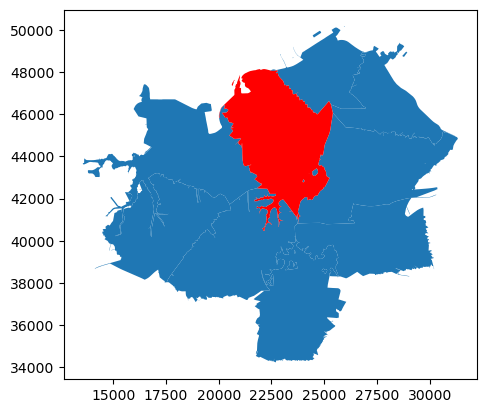

In [5]:
ax = chunks.loc[w.neighbors[2]].plot()
chunks.loc[[2]].plot(ax=ax, color='r')

In [6]:
import dask
dask.config.set({'logging.distributed': 'error'})

In [7]:
daskCluster = LocalCluster(threads_per_worker=2,
                n_workers=8, memory_limit='100GB')

client = Client(daskCluster)

client

2023-03-24 22:41:33,746 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,748 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,750 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,751 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,754 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,755 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,757 - distributed.nanny.memory - WARNING - Ignoring provided memory limit 100GB due to system memory limit of 62.02 GiB
2023-03-24 22:41:33,

<Client: 'tcp://127.0.0.1:36277' processes=8 threads=16, memory=496.19 GiB>

In [8]:
def duplicates(tessellation):

    # Check for duplicates based on UID
    duplicates = tessellation[tessellation.duplicated(subset='uID', keep=False)]

    # duplicates.to_file( "./out/" + place + 'errors.shp', driver='ESRI Shapefile')

    # Print the duplicate rows
    if len(duplicates) > 0:
        raise Exception("Tesselation: Duplicate UID entries:")
    elif (tessellation["uID"].isnull().values.any()):
        raise Exception("uID column include invalid entries")
    else:
        print("combined_chunk no problems")
        return 0

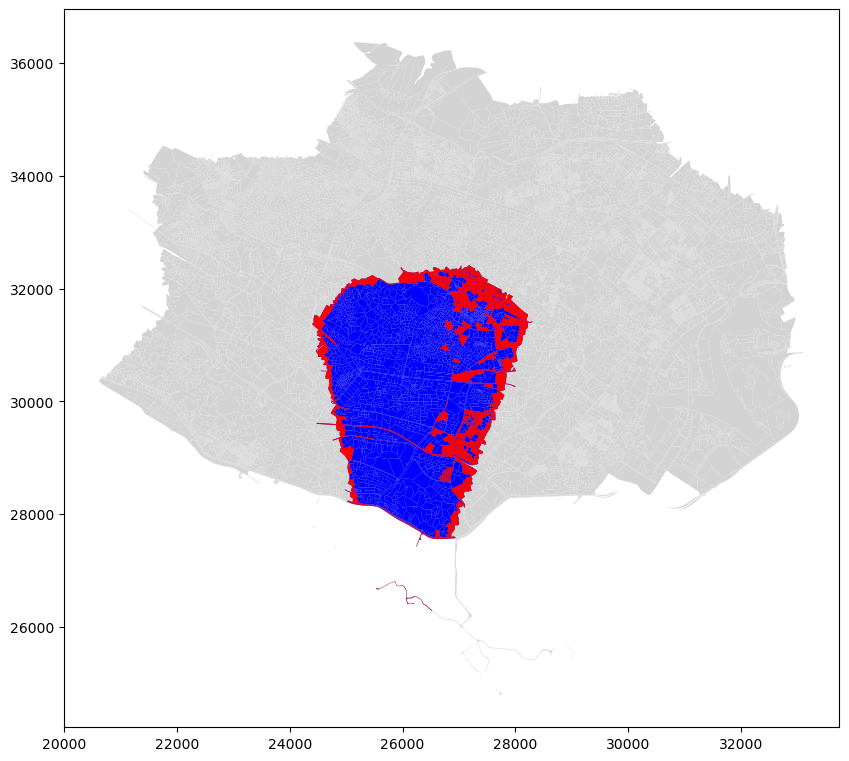

starting expand_one_order, chunk 0 order 3


/home/ubuntu/miniconda3/lib/python3.10/site-packages/distributed/protocol/pickle.py:96: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  return pickle.loads(x)
/home/ubuntu/miniconda3/lib/python3.10/site-packages/distributed/protocol/pickle.py:96: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use Py

compute done this wave
chunk 0 , order 3 , sublist 0 of 31
compute done this wave
chunk 0 , order 3 , sublist 1 of 31


/home/ubuntu/miniconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


compute done this wave
chunk 0 , order 3 , sublist 2 of 31
compute done this wave
chunk 0 , order 3 , sublist 3 of 31
compute done this wave
chunk 0 , order 3 , sublist 4 of 31
compute done this wave
chunk 0 , order 3 , sublist 5 of 31


2023-03-24 22:43:47,196 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


compute done this wave
chunk 0 , order 3 , sublist 6 of 31


2023-03-24 22:44:01,588 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:44:01,885 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:44:03,512 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:44:03,709 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:44:03,945 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


compute done this wave
chunk 0 , order 3 , sublist 7 of 31


2023-03-24 22:44:18,253 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:44:18,534 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:44:18,888 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:44:20,473 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:44:20,685 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:44:20,939 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


compute done this wave
chunk 0 , order 3 , sublist 8 of 31


2023-03-24 22:44:35,465 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:44:35,775 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:44:37,381 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:44:37,580 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:44:37,816 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


compute done this wave
chunk 0 , order 3 , sublist 9 of 31


2023-03-24 22:44:51,666 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,686 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,693 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,694 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,713 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,723 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,733 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:44:51,766 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 10 of 31


2023-03-24 22:44:56,362 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:09,160 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:09,470 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:09,792 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:11,383 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:11,608 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


compute done this wave
chunk 0 , order 3 , sublist 11 of 31


2023-03-24 22:45:25,352 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,356 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,359 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,369 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,371 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,389 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,399 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:25,463 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 12 of 31


2023-03-24 22:45:42,458 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,480 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,483 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,497 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,498 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,501 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,502 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:42,569 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 13 of 31


2023-03-24 22:45:59,049 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,053 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,063 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,495 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,497 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,512 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,517 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:45:59,526 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 14 of 31


2023-03-24 22:46:15,916 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,310 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,316 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,351 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,684 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,689 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,692 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:16,700 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 15 of 31


2023-03-24 22:46:32,834 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:32,842 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:32,846 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:32,847 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:32,851 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:32,853 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:33,258 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:33,285 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 16 of 31


2023-03-24 22:46:49,352 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,357 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,360 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,361 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,362 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,367 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,804 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:46:49,806 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 17 of 31


2023-03-24 22:47:06,478 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,479 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,479 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,485 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,485 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,509 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,845 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:06,849 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 18 of 31


2023-03-24 22:47:23,636 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:23,644 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:23,645 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:23,645 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:23,652 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:23,671 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:24,052 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:24,057 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 19 of 31


2023-03-24 22:47:40,626 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,635 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,638 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,639 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,645 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,646 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,648 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:40,682 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 20 of 31


2023-03-24 22:47:57,589 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,595 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,599 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,601 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,602 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,604 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,607 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:47:57,643 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 21 of 31


2023-03-24 22:48:13,945 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,949 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,949 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,954 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,955 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,958 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,962 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:13,964 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 22 of 31


2023-03-24 22:48:30,974 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:30,981 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:30,981 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:30,982 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:30,986 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:30,986 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:30,991 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:31,011 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 23 of 31


2023-03-24 22:48:48,079 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,088 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,088 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,090 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,091 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,093 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,094 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:48:48,128 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 24 of 31


2023-03-24 22:49:05,299 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,299 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,301 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,304 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,306 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,317 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,319 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:05,337 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 25 of 31


2023-03-24 22:49:22,286 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,287 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,287 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,287 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,294 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,306 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,311 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:22,340 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 26 of 31


2023-03-24 22:49:38,820 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,829 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,832 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,832 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,834 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,834 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,836 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:38,840 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 27 of 31


2023-03-24 22:49:55,761 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,769 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,771 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,776 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,779 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,781 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,781 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:49:55,797 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 28 of 31


2023-03-24 22:50:12,904 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,906 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,911 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,912 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,914 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,918 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,921 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:12,934 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 0 , order 3 , sublist 29 of 31


2023-03-24 22:50:22,119 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:22,121 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:22,121 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:22,313 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:22,329 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:22,499 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:50:23,147 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


compute done this wave
chunk 0 , order 3 , sublist 30 of 31


2023-03-24 22:50:24,267 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:25,082 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:25,698 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:26,412 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:27,149 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:27,979 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:28,911 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:29,973 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:50:40,010 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,104 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,136 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,150 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,177 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,314 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,334 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:50:40,413 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:50:44,546 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:44,576 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:44,749 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:44,764 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:44,773 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:44,806 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:44,979 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:45,065 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:50:49,771 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:50:49,893 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:50:49,986 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:50,048 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:50,132 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:50,194 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:50,216 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:50:50,281 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:50:54,811 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:54,872 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:50:54,899 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:50:54,921 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:50:54,929 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:50:54,935 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:50:55,160 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:50:55,283 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:00,390 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:00,451 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:00,518 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:00,613 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:00,709 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:00,745 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:00,816 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:01,055 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:05,906 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,023 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,066 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,179 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,187 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,237 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,473 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:06,533 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:11,419 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,511 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,546 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,560 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,693 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,711 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,732 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:11,822 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:16,205 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,338 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,389 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,501 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,650 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,659 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,688 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:51:16,916 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:22,161 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,314 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,410 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,457 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,484 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,566 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,585 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:22,612 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:27,192 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,192 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,226 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,415 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,566 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,650 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,770 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:27,891 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:32,282 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,384 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,438 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,475 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,475 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,650 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,798 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:32,813 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:37,329 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,510 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,512 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,587 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,681 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,763 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,775 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:51:37,943 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:42,847 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:42,915 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:42,934 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:43,013 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:43,047 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:51:43,142 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:51:43,219 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:43,285 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:47,847 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:51:47,972 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:48,092 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:51:48,105 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:48,207 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 22:51:48,210 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:51:48,329 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:48,364 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:51:55,897 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,182 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,192 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,214 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,297 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,476 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,563 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:51:56,728 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:52:04,790 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:04,849 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:04,930 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:05,069 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:05,095 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:05,098 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:52:05,124 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:05,303 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:52:13,699 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:13,972 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:14,205 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:14,412 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:14,443 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:14,524 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:14,581 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:14,687 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:52:22,683 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:22,843 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:22,869 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:22,876 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:52:22,925 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:23,083 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:23,122 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:52:23,135 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:52:31,538 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:31,553 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:31,662 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 22:52:31,820 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:52:31,893 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:32,002 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:32,067 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:52:32,243 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:52:40,441 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:40,478 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:40,710 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:52:41,009 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:52:41,181 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:52:41,238 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:52:41,265 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:52:41,444 - distributed.utils_perf - WARNING - full garbage collections took

cells added this wave


2023-03-24 22:52:49,171 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-03-24 22:52:51,442 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


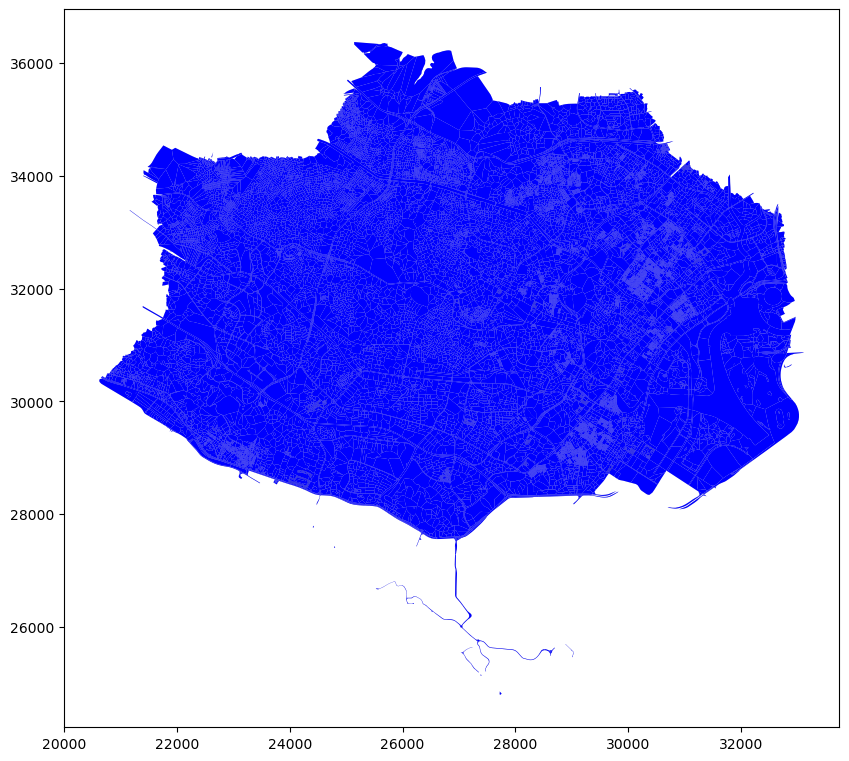

starting expand_one_order, chunk 0 order 2
cells added this wave


2023-03-24 22:53:06,850 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


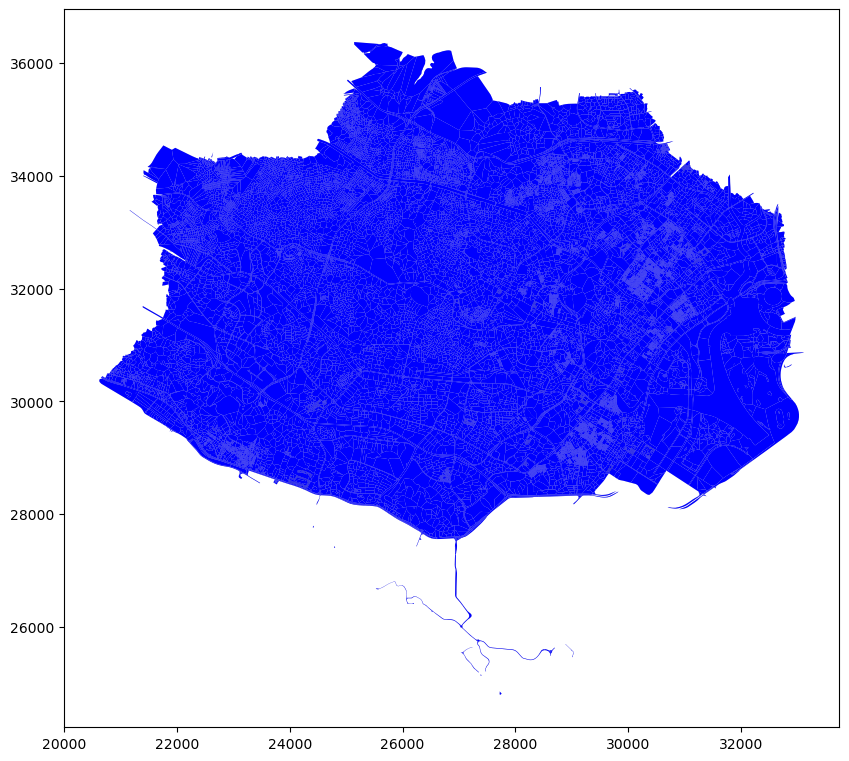

starting expand_one_order, chunk 0 order 1
cells added this wave


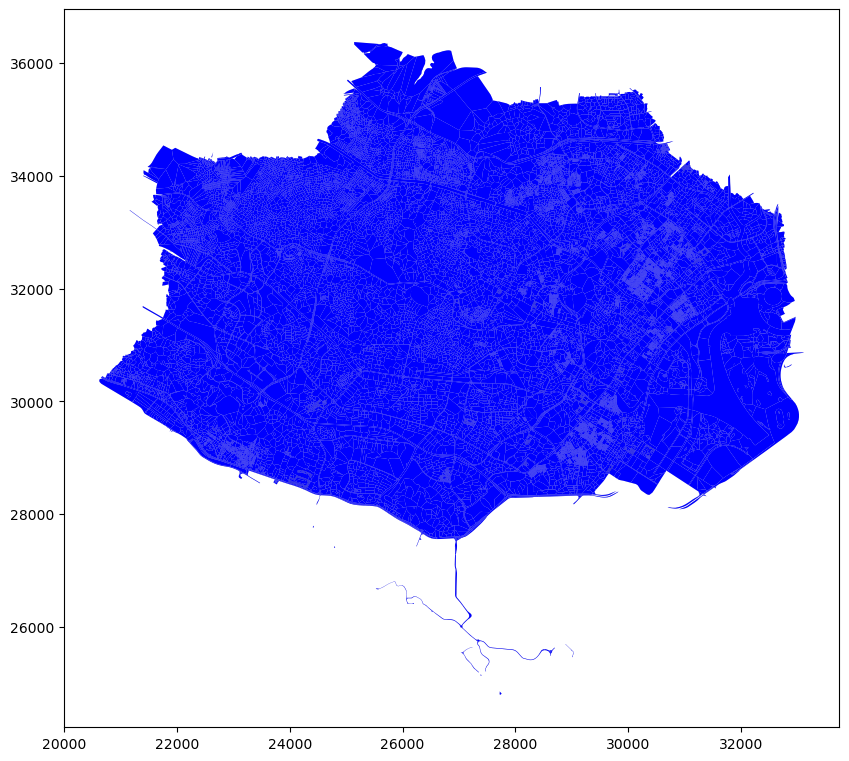

starting expand_one_order, chunk 0 order 0


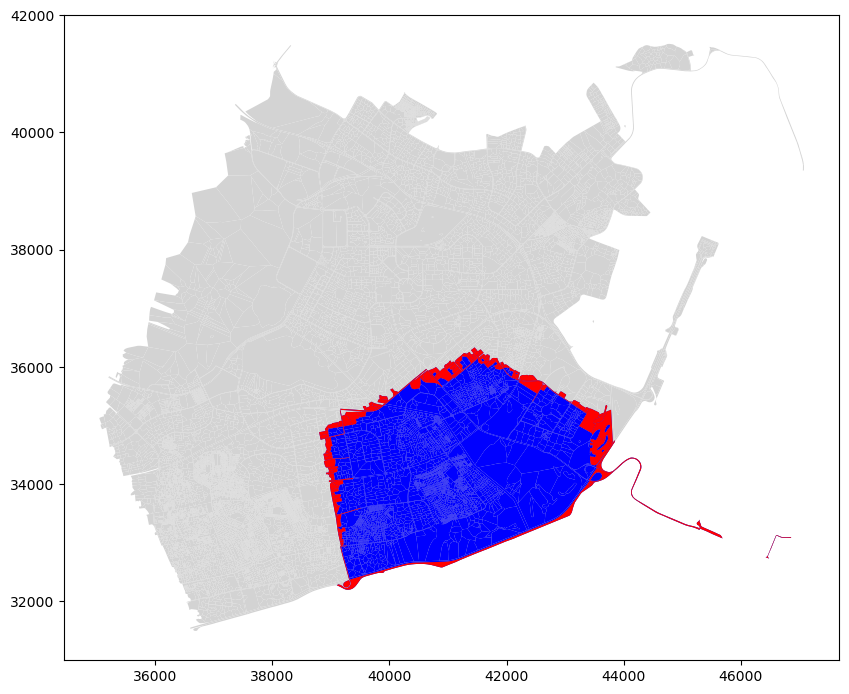

starting expand_one_order, chunk 1 order 3


2023-03-24 22:54:06,971 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,028 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,039 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,075 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,078 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,100 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,119 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:07,295 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 0 of 10


2023-03-24 22:54:19,327 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,375 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,396 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,435 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,436 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,465 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,481 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:19,637 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 1 of 10


2023-03-24 22:54:31,909 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:31,939 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:31,947 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:31,991 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:31,993 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:32,012 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:32,039 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:32,111 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 2 of 10


2023-03-24 22:54:44,368 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,426 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,460 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,487 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,504 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,506 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,525 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:44,572 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 3 of 10


2023-03-24 22:54:56,808 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,865 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,898 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,915 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,917 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,933 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,963 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:54:56,977 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 4 of 10


2023-03-24 22:55:09,312 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,352 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,362 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,409 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,411 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,417 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,418 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:09,440 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 5 of 10


2023-03-24 22:55:21,744 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,819 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,819 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,838 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,839 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,843 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,848 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:21,869 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 6 of 10


2023-03-24 22:55:34,285 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,343 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,344 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,345 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,350 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,353 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,372 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:34,394 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 7 of 10


2023-03-24 22:55:46,740 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,751 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,757 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,758 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,765 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,768 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,792 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:46,824 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 1 , order 3 , sublist 8 of 10


2023-03-24 22:55:54,233 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:54,377 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:54,542 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:54,545 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:54,548 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:55:54,556 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:55:54,558 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


compute done this wave
chunk 1 , order 3 , sublist 9 of 10


2023-03-24 22:56:04,656 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,181 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,250 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,277 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,288 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,315 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,359 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:05,380 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:09,874 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,054 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,088 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,102 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,118 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,222 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,308 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:10,370 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:14,773 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:14,774 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:15,047 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:15,077 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:15,091 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:15,141 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:56:15,261 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:15,342 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:19,795 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:19,918 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:19,993 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:56:20,054 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:56:20,153 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:56:20,166 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:20,294 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:20,306 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:25,045 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,049 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,051 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,080 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,310 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,374 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,398 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:56:25,443 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:30,563 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:30,573 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:56:30,658 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:56:30,714 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:30,789 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:30,827 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:30,892 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:31,006 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:36,545 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:36,624 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:56:36,825 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:37,162 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:56:37,546 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:37,576 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:56:37,602 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:56:37,655 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 22:56:45,749 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 22:56:45,916 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:56:46,066 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:56:46,079 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 22:56:46,393 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:56:46,585 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


cells added this wave


2023-03-24 22:56:46,868 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


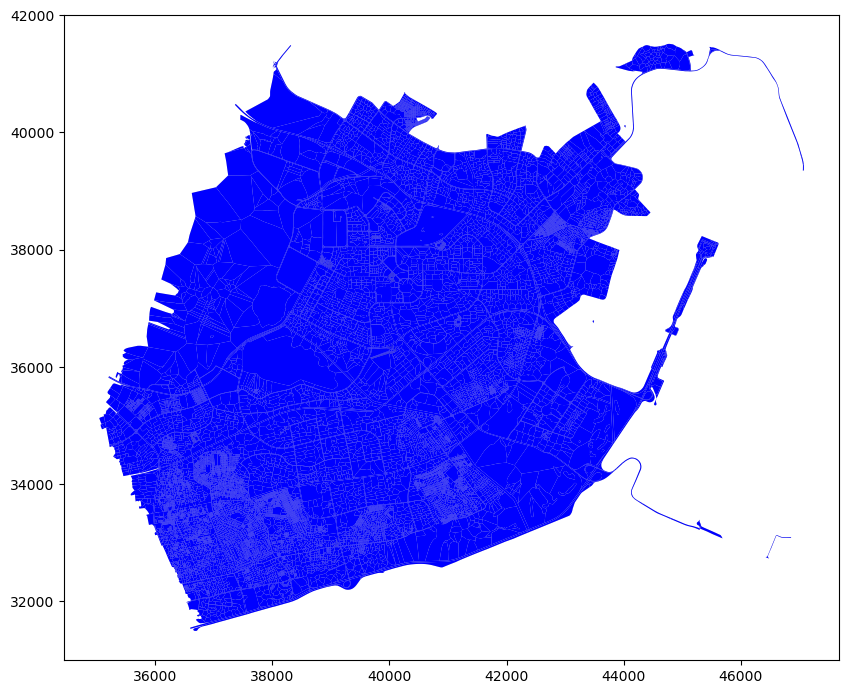

starting expand_one_order, chunk 1 order 2
cells added this wave


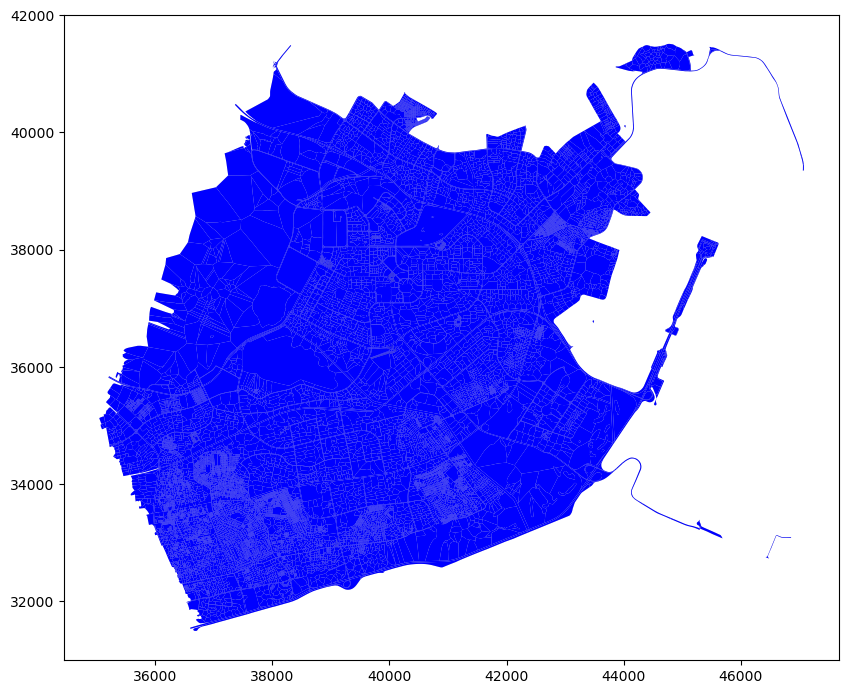

starting expand_one_order, chunk 1 order 1
cells added this wave


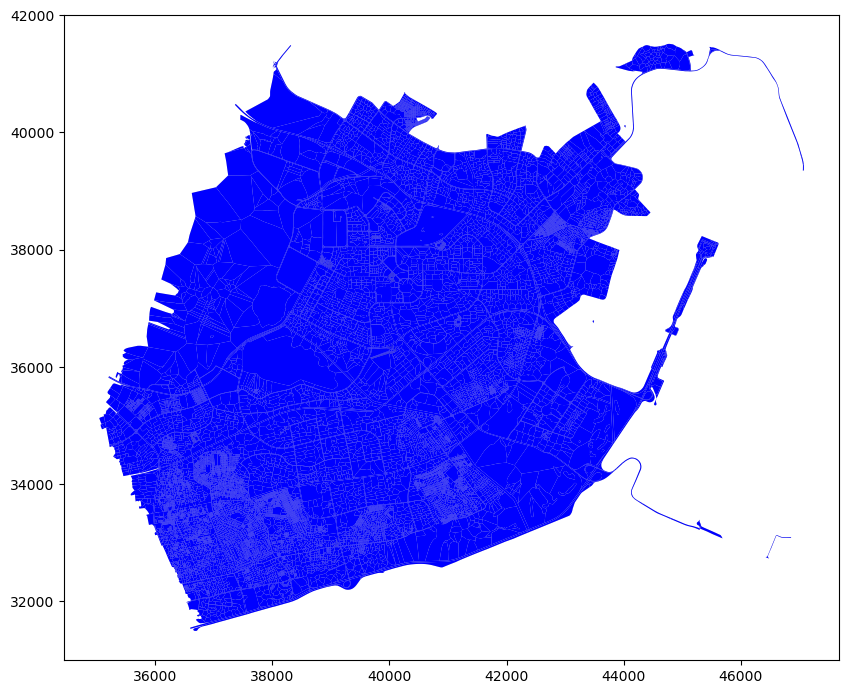

starting expand_one_order, chunk 1 order 0


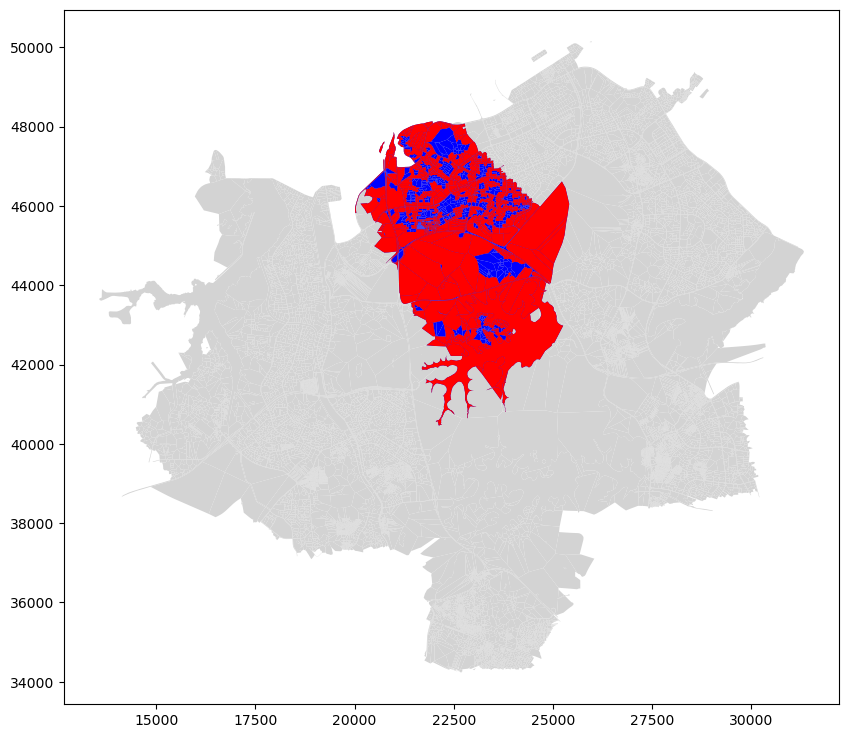

starting expand_one_order, chunk 2 order 3


2023-03-24 22:57:46,231 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,334 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,351 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,380 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,399 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,528 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,534 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:57:46,586 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 0 of 62


2023-03-24 22:58:01,334 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,344 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,385 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,408 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,555 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,561 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,564 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:58:01,682 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 1 of 62


2023-03-24 22:58:16,593 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,628 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,630 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,761 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,907 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,910 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,942 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 22:58:16,948 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 2 of 62


2023-03-24 22:58:31,622 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,721 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,742 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,785 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,797 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,897 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,907 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:31,909 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 3 of 62


2023-03-24 22:58:46,816 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:46,831 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:46,862 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:58:46,916 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 22:58:47,007 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:47,042 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:58:47,043 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:58:47,142 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 4 of 62


2023-03-24 22:59:01,730 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:01,768 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:01,768 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:01,937 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:02,007 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:02,008 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:02,031 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:02,036 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 5 of 62


2023-03-24 22:59:16,981 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,035 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,069 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,096 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,133 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,206 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,213 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:17,223 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 6 of 62


2023-03-24 22:59:31,952 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:31,987 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:31,991 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:32,030 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 22:59:32,155 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:32,170 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:32,177 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:32,252 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 7 of 62


2023-03-24 22:59:47,071 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,215 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,240 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,245 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,392 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,461 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,478 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 22:59:47,534 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 8 of 62


2023-03-24 23:00:02,078 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,089 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,238 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,327 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,371 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,371 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,426 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:00:02,474 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 9 of 62


2023-03-24 23:00:17,292 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,381 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,418 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,438 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,472 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,597 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,631 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:17,681 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 10 of 62


2023-03-24 23:00:32,619 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,746 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,774 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,774 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,971 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,979 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,982 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:32,984 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 11 of 62


2023-03-24 23:00:47,963 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,006 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,019 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,152 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,253 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,261 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,287 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:00:48,372 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 12 of 62


2023-03-24 23:01:03,078 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,175 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,181 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,212 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,271 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,392 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,436 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:03,451 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 13 of 62


2023-03-24 23:01:18,514 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,547 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,679 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,703 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,708 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,842 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,895 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:18,944 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 14 of 62


2023-03-24 23:01:33,437 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,468 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,469 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,608 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,705 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,764 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,778 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:33,785 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 15 of 62


2023-03-24 23:01:48,816 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:48,921 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:48,940 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:48,942 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:48,988 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:49,114 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:01:49,144 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:01:49,175 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 16 of 62


2023-03-24 23:02:04,164 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,184 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,195 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,238 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,349 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,377 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,382 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:04,507 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 17 of 62


2023-03-24 23:02:19,414 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,445 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,446 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,598 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,715 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,729 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,751 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:19,760 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 18 of 62


2023-03-24 23:02:34,659 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,737 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,784 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,793 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,844 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,931 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,941 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:34,997 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 19 of 62


2023-03-24 23:02:49,805 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:49,833 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:49,847 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:49,883 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:02:49,990 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:50,024 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:50,078 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:02:50,147 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 20 of 62


2023-03-24 23:03:04,947 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:04,988 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:04,994 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:05,185 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:05,224 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:05,228 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:05,249 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:05,268 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 21 of 62


2023-03-24 23:03:20,379 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,499 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,508 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,509 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,557 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,622 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,629 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:20,629 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 22 of 62


2023-03-24 23:03:35,209 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,386 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,427 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,439 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,475 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,592 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,656 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:35,698 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 23 of 62


2023-03-24 23:03:50,411 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,539 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,575 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,580 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,721 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,774 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,782 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:03:50,847 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 24 of 62


2023-03-24 23:04:05,752 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:05,758 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:05,892 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:04:05,987 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:06,005 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:06,058 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:06,070 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:06,123 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 25 of 62


2023-03-24 23:04:21,031 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,115 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,144 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,156 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,199 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,347 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,383 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:21,391 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 26 of 62


2023-03-24 23:04:36,061 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,248 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,362 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,395 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,399 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,559 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,583 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:36,591 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 27 of 62


2023-03-24 23:04:51,617 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:51,660 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:51,662 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:51,807 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:51,929 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:51,930 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:51,946 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:04:52,008 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 28 of 62


2023-03-24 23:05:06,807 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:05:06,897 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:06,927 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:05:06,958 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:06,973 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:07,086 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:07,135 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:07,142 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 29 of 62


2023-03-24 23:05:22,061 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,083 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,136 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,247 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,284 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,303 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,418 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:05:22,438 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 30 of 62


2023-03-24 23:05:37,178 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,207 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,217 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,349 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,468 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,490 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,510 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:37,534 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 31 of 62


2023-03-24 23:05:52,557 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,647 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,678 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,699 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,743 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,833 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,835 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:05:52,845 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 32 of 62


2023-03-24 23:06:07,608 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,656 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,657 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,698 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,812 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,830 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,845 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:07,958 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 33 of 62


2023-03-24 23:06:22,957 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:22,998 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:23,014 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:23,201 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:23,251 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:23,253 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:06:23,254 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:23,283 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 34 of 62


2023-03-24 23:06:38,130 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,196 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,230 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,232 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,289 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,367 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,376 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:38,377 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 35 of 62


2023-03-24 23:06:53,435 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,458 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,470 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,520 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,631 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,668 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,674 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:06:53,802 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 36 of 62


2023-03-24 23:07:08,592 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,638 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,651 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,784 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,862 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,881 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,889 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:08,926 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 37 of 62


2023-03-24 23:07:23,348 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,516 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,683 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,757 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,783 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,787 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,846 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:23,897 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 38 of 62


2023-03-24 23:07:38,811 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:38,887 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:38,927 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:07:38,940 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:38,990 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:39,090 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:39,122 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:07:39,188 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 39 of 62


2023-03-24 23:07:53,922 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,031 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,078 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,081 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,242 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,276 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,281 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:07:54,337 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 40 of 62


2023-03-24 23:08:09,188 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,188 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,335 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,430 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,436 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,443 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,506 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:09,547 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 41 of 62


2023-03-24 23:08:24,227 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,302 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,332 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,334 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,385 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,489 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,534 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:08:24,538 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 42 of 62


2023-03-24 23:08:39,476 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,484 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,527 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,645 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,668 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,683 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,831 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:39,862 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 43 of 62


2023-03-24 23:08:54,607 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,659 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,662 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,799 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,875 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,948 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,950 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:08:54,990 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 44 of 62


2023-03-24 23:09:09,793 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:09,898 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:09,910 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:09:09,915 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:09,959 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:10,068 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:10,070 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:09:10,075 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 45 of 62


2023-03-24 23:09:24,792 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:24,834 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:24,842 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:09:24,885 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:24,994 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:25,059 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:09:25,069 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:25,156 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 46 of 62


2023-03-24 23:09:39,969 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,022 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,037 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,173 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,237 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,271 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,281 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:40,281 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 47 of 62


2023-03-24 23:09:55,314 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,372 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,407 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,415 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,477 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,557 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,558 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:09:55,604 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 48 of 62


2023-03-24 23:10:10,367 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,394 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,406 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,449 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,566 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,600 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,606 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:10,690 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 49 of 62


2023-03-24 23:10:25,651 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,688 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,698 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,849 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,905 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,928 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,930 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:25,971 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 50 of 62


2023-03-24 23:10:40,629 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-03-24 23:10:40,640 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:40,803 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:40,855 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:40,894 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:40,956 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:10:40,957 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:41,033 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 51 of 62


2023-03-24 23:10:55,820 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:55,857 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:55,916 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:55,953 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:10:55,973 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:56,076 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:56,115 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:10:56,123 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 52 of 62


2023-03-24 23:11:11,212 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,316 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,373 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,381 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,559 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,569 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,575 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:11:11,629 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 53 of 62


2023-03-24 23:11:26,475 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,480 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,632 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,686 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,727 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,747 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,831 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:26,846 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 54 of 62


2023-03-24 23:11:41,754 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:41,796 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:41,853 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:41,866 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:11:41,905 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:42,010 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:42,061 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:42,108 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 55 of 62


2023-03-24 23:11:57,057 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,189 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,253 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,377 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,414 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,415 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,582 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:11:57,583 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 56 of 62


2023-03-24 23:12:12,407 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,449 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,455 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,615 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,662 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,705 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,708 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:12,744 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 57 of 62


2023-03-24 23:12:27,863 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:27,915 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:27,962 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:27,964 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:28,008 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:28,136 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:28,154 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:28,184 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 58 of 62


2023-03-24 23:12:43,013 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,023 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,059 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,193 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,251 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,266 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,352 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:43,392 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 59 of 62


2023-03-24 23:12:58,414 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,462 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,473 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,621 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,674 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,763 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,766 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:12:58,772 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 2 , order 3 , sublist 60 of 62


2023-03-24 23:13:06,038 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:06,092 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:06,115 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:13:06,181 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


compute done this wave
chunk 2 , order 3 , sublist 61 of 62


2023-03-24 23:13:18,376 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:13:18,748 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:18,829 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:13:18,914 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:13:18,924 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:18,947 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:13:19,145 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-03-24 23:13:19,181 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:13:24,270 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,441 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,469 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,567 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,571 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,634 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,708 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:24,782 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:13:29,843 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 23:13:29,906 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:29,970 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:30,008 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:30,064 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 23:13:30,167 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:30,371 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:30,434 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:13:35,816 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:35,967 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:13:36,068 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:36,141 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:36,293 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:36,437 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:36,498 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 23:13:36,507 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:13:42,186 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,315 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,389 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,472 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,762 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,773 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,852 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:42,899 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:13:48,544 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:48,642 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:13:48,684 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:13:48,824 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:48,978 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:49,004 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:49,036 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:13:49,092 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:13:56,180 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,467 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,494 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,511 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,567 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,721 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,746 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:13:56,791 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:04,314 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:14:04,787 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:04,925 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:05,055 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:14:05,190 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:05,253 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2023-03-24 23:14:05,351 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:05,616 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:12,861 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,021 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,250 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,281 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,296 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,349 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,631 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:13,730 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:18,930 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,335 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,479 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,591 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,606 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,667 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,872 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:14:19,907 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:27,040 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:14:27,243 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:27,297 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:27,371 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:27,394 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:14:27,656 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:14:27,716 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:28,085 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:36,868 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:14:36,921 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:37,008 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:14:37,227 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 23:14:37,428 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:37,499 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:14:37,622 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 23:14:37,951 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:44,941 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:14:44,964 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:44,994 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:14:45,026 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:14:45,027 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:45,233 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2023-03-24 23:14:45,268 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:14:45,469 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:52,519 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:52,540 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:14:52,614 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:14:52,760 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:14:52,886 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:52,913 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:53,042 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:14:53,083 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:14:59,423 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,456 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,480 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,552 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,605 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,746 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,829 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:14:59,957 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:15:05,628 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2023-03-24 23:15:05,818 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:15:05,901 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:15:05,998 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:15:06,480 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:15:06,563 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2023-03-24 23:15:06,646 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:15:06,831 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:15:15,408 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,492 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,528 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,579 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,691 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,898 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,907 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:15:15,998 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:15:21,131 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,155 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,295 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,307 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,402 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,524 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,540 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:21,650 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:15:34,652 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:35,022 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:35,453 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:35,950 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:15:36,160 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:36,435 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:36,512 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:15:36,528 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:15:43,473 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:15:43,644 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:15:43,871 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:43,896 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:15:44,020 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:15:44,209 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:15:44,492 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:15:44,595 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:00,312 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:00,450 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:16:00,608 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:16:00,946 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:16:01,359 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:01,367 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:16:01,591 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:16:01,772 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:08,802 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:08,830 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:08,873 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:16:08,942 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:16:09,206 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:16:09,243 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:09,356 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:09,436 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:14,186 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,291 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,358 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,379 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,432 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,562 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,587 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:14,641 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:19,506 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:19,604 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:19,727 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:16:19,816 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:16:19,819 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:19,984 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:16:20,127 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:16:20,216 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:24,941 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,025 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,144 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,361 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,364 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,417 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,465 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:25,520 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:30,426 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:16:30,429 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:16:30,437 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:16:30,716 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:30,736 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:30,804 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:16:31,088 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:16:31,137 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:36,476 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:36,493 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2023-03-24 23:16:36,560 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:16:36,605 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:16:36,650 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:16:36,801 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:16:36,862 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:37,053 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:43,153 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2023-03-24 23:16:43,474 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2023-03-24 23:16:43,937 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:44,274 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:44,727 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2023-03-24 23:16:45,025 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:45,426 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:45,773 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:16:56,145 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:56,393 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2023-03-24 23:16:56,912 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:16:57,101 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:57,434 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:16:57,556 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:16:57,576 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2023-03-24 23:16:57,724 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:17:07,372 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:07,549 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:07,790 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:08,129 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:08,409 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:08,686 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:08,904 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2023-03-24 23:17:09,009 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:17:18,370 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:18,641 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:18,998 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:19,393 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:19,566 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:19,688 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:19,717 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:19,728 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:17:28,825 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,124 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,305 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,541 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,727 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,735 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,818 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:29,836 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:17:39,593 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:39,610 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:17:39,646 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:39,932 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:40,245 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:40,530 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:17:40,845 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:17:41,128 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:17:49,735 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:17:49,760 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:17:49,870 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:17:49,898 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:49,976 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:17:50,255 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2023-03-24 23:17:50,577 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:17:50,943 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:18:00,704 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:18:00,776 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:18:00,866 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:01,027 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2023-03-24 23:18:01,199 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:01,607 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:18:01,879 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:18:02,054 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:18:11,737 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,010 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,016 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,020 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,072 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,334 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,338 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2023-03-24 23:18:12,342 - distributed.utils_perf - WARNING - full garbage collections took

2023-03-24 23:18:22,184 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:22,445 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:18:22,705 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:18:23,086 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:23,264 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:23,320 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2023-03-24 23:18:23,338 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:18:23,346 - distributed.utils_perf - WARNING - full garbage collections took

cells added this wave


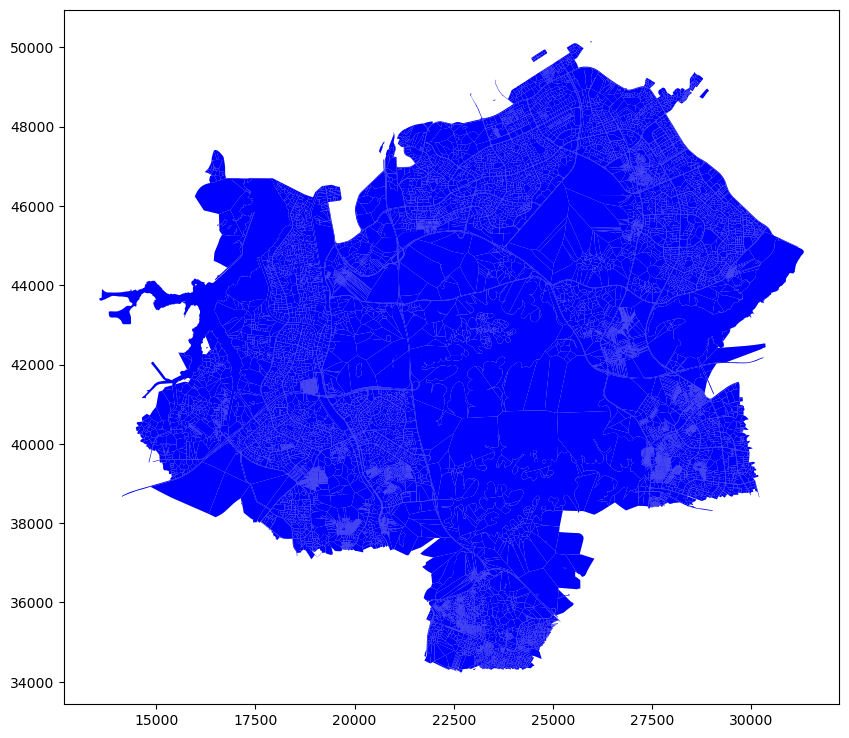

starting expand_one_order, chunk 2 order 2


2023-03-24 23:18:42,544 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


cells added this wave


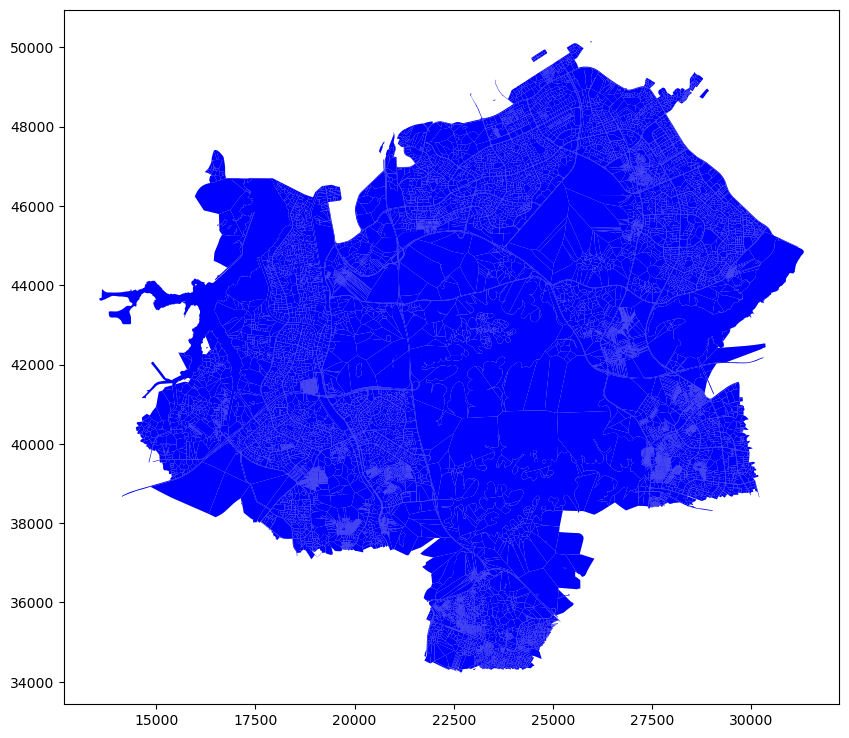

starting expand_one_order, chunk 2 order 1
cells added this wave


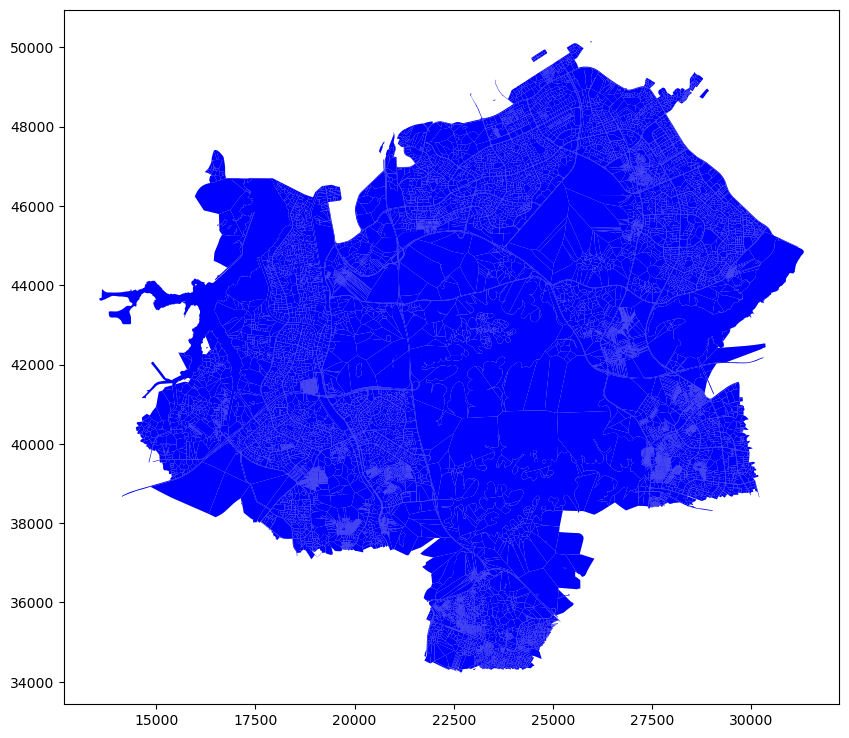

starting expand_one_order, chunk 2 order 0


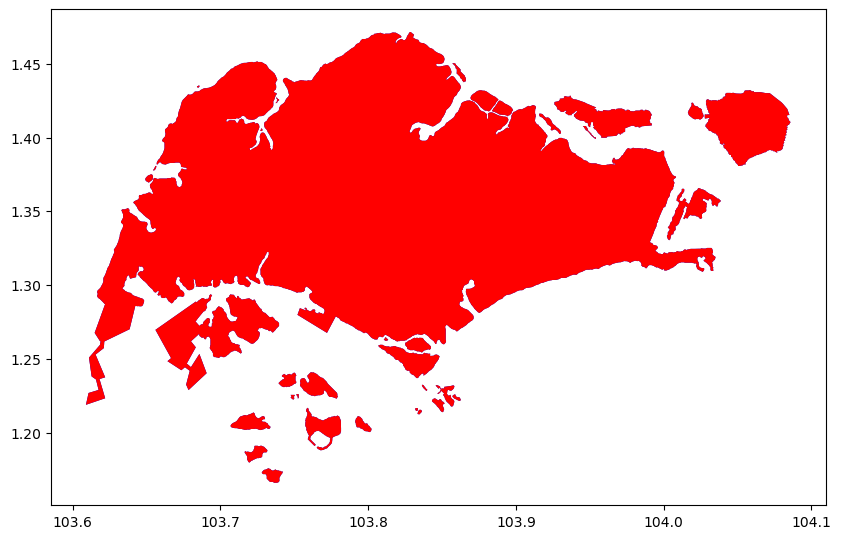

starting expand_one_order, chunk 3 order 3
compute done this wave
chunk 3 , order 3 , sublist 0 of 3
compute done this wave
chunk 3 , order 3 , sublist 1 of 3
compute done this wave
chunk 3 , order 3 , sublist 2 of 3
cells added this wave


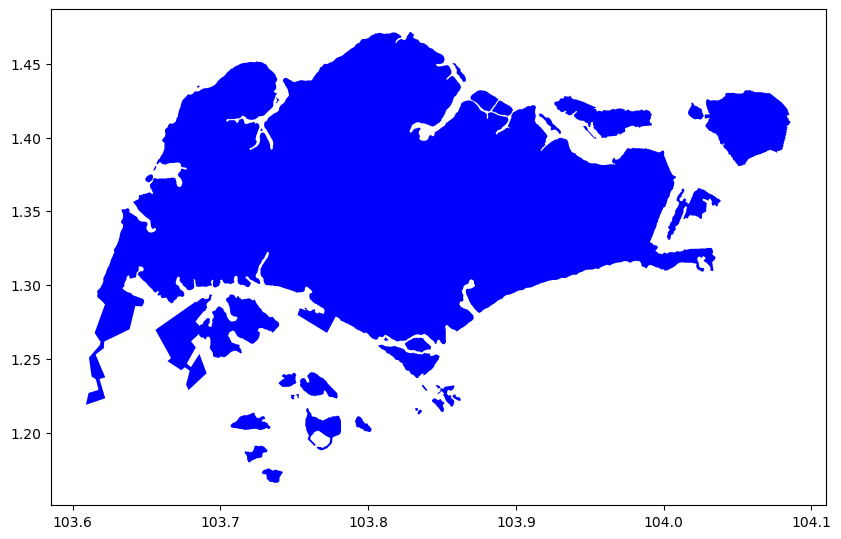

starting expand_one_order, chunk 3 order 2
cells added this wave


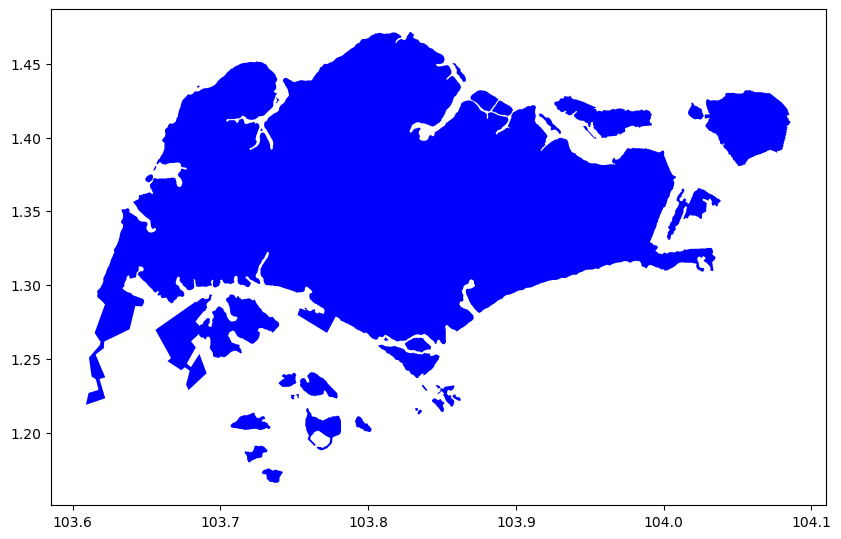

starting expand_one_order, chunk 3 order 1
cells added this wave


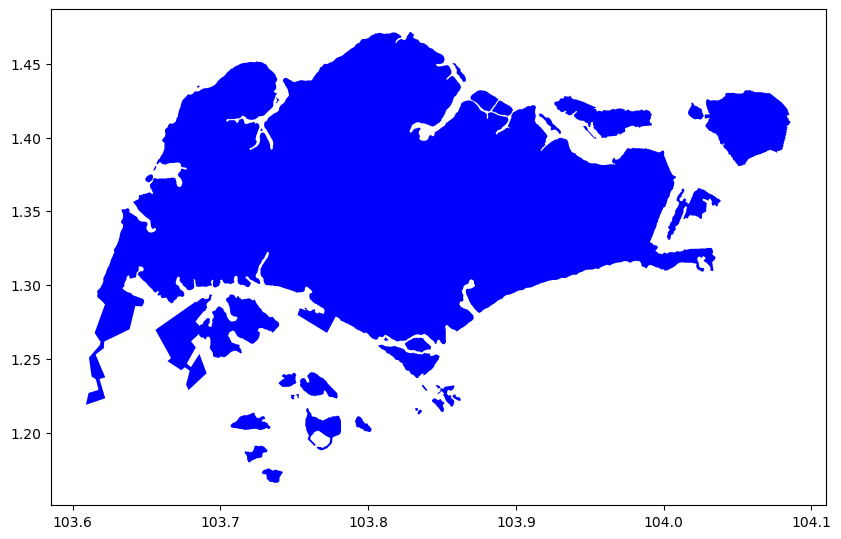

starting expand_one_order, chunk 3 order 0


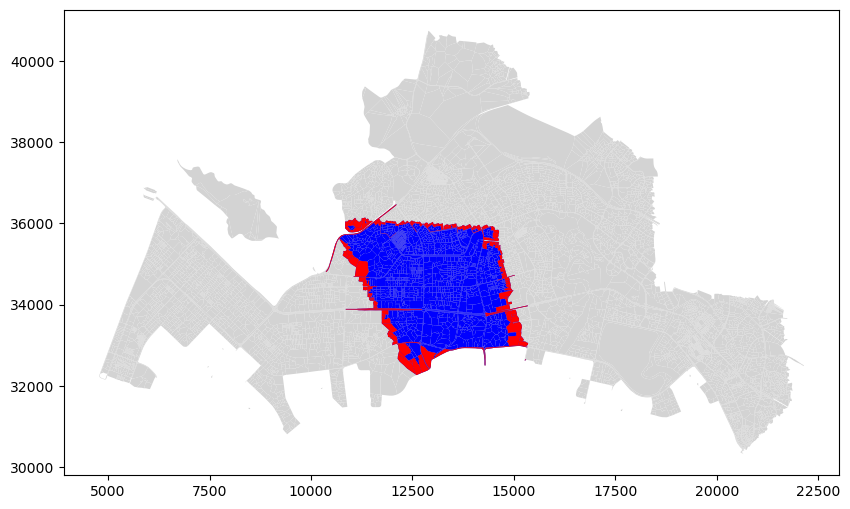

starting expand_one_order, chunk 4 order 3


2023-03-24 23:19:26,053 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,101 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,134 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,224 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,226 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,279 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,344 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:19:26,391 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 4 , order 3 , sublist 0 of 14


2023-03-24 23:19:35,281 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,335 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,347 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,491 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,496 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,546 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,626 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:35,658 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 4 , order 3 , sublist 1 of 14


2023-03-24 23:19:44,645 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:44,752 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:44,838 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:44,875 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:44,941 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:44,980 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:45,020 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:45,067 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 4 , order 3 , sublist 2 of 14


2023-03-24 23:19:54,100 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,155 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,219 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,242 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,300 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,327 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,354 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:19:54,432 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 4 , order 3 , sublist 3 of 14


2023-03-24 23:20:03,206 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,345 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,359 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,372 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,378 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,416 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,485 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2023-03-24 23:20:03,596 - distributed.utils_perf - WARNING - full garbage collections took

compute done this wave
chunk 4 , order 3 , sublist 4 of 14


KeyboardInterrupt: 

In [9]:
queen_out = {}

@delayed
def neigh_look(cell_id, main_chunk_ids, combined_chunks): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        warnings.simplefilter("ignore")
        cell_poly = combined_chunks.loc[combined_chunks['uID'] == cell_id]
        neighbours = combined_chunks[~combined_chunks.geometry.disjoint(cell_poly)]
        return neighbours.uID.tolist()

def expand_one_order(n1, main_chunk_ids, added_cells_ids, order, combined_chunks):
    
    red_gdf = combined_chunks[combined_chunks['uID'].isin(added_cells_ids)]
    
    blue_gdf = combined_chunks[combined_chunks['uID'].isin(main_chunk_ids)]
    
    # plot the GeoDataFrames on the same plot
    fig, ax = plt.subplots(figsize=(10, 10))
    combined_chunks.plot(ax=ax, color='lightgray')
    blue_gdf.plot(ax=ax, color='blue')
    red_gdf.plot(ax=ax, color='red')
    plt.show()
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        warnings.simplefilter("ignore")
    
        print("starting expand_one_order, chunk " + str(n1) + " order " + str(order), flush=True)
                
        if order == 0:
            return main_chunk_ids

        results = db.from_sequence(main_chunk_ids)
        
        chunk_size = 16
        added_cells_ids_chunks = [added_cells_ids[i:i+chunk_size] for i in range(0, len(added_cells_ids), chunk_size)]
        
        len_sublist = len(added_cells_ids_chunks)
        for i, sublist in enumerate(added_cells_ids_chunks):

            delay_objs =[]
            new_results = []
                
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=UserWarning)
                delay_objs = [neigh_look(cell_id, main_chunk_ids, combined_chunks) for cell_id in sublist]
                new_results = dask.compute(delay_objs)
                new_results_bag = db.from_sequence(chain(*new_results[0]))
                results = db.concat([results, new_results_bag]).distinct()
                
                        
            print("compute done this wave", flush=True)
            print("chunk " + str(n1) + " , order " + str(order) +" , sublist " + str(i) + " of " + str(len_sublist), flush=True)
                
        expanded_cells = list(results.compute())

        neighbouring_cells = [cell for cell in added_cells_ids if cell not in main_chunk_ids]
        print("cells added this wave", flush=True)
    
    return expand_one_order(n1, expanded_cells, neighbouring_cells, order-1, combined_chunks)
    
def process_chunk(n1, order, neighbours, chunk):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        warnings.simplefilter("ignore")
            
        main_chunk = gpd.read_parquet(f"./out/singapore/tess_chunk_{int(n1)}.pq")
        combined_chunks = main_chunk

        main_chunk_ids = list(main_chunk['uID'])
        results = []

        for n2 in neighbours:
            neigh_chunk = gpd.read_parquet(f"./out/singapore/tess_chunk_{int(n2)}.pq")
            combined_chunks = combined_chunks.append(neigh_chunk)

        combined_chunks = combined_chunks.reindex()
        
        chunk_boundary = []
        
        buffer = gpd.GeoDataFrame(geometry = [chunk.boundary[n1].buffer(5)], crs=main_chunk.crs)
        
        # find the rows in main_chunk that intersect the buffered polygon
        intersecting_rows = gpd.sjoin(main_chunk, buffer, how='inner', op='intersects')
        
#         intersecting_rows.plot(figsize=(5, 5))
#         plt.show()
        
        out = expand_one_order(n1, main_chunk_ids, intersecting_rows["uID"].tolist(), order, combined_chunks)
        
        return out

# for n1 in tqdm(range(10), total=10):
#     queen_out[n1] = process_chunk(n1)

file_pattern = "./out/singapore/tess_chunk_*.pq"
file_list = glob.glob(file_pattern)
num_files = len(file_list)

# combined_chunks=[]
# delayed_tasks = []
# for n1 in range(num_files):
#     delayed_task = process_chunk(n1, w, combined_chunks)
#     delayed_tasks.append(delayed_task)

#     results = delayed_tasks

queen_out = [process_chunk(n1, 3, w.neighbors[n1], chunks.loc[[n1]]) for n1 in range(num_files)]


for n1 in tqdm(range(num_files)):
    queen_out[n1].to_parquet(f"./out/singapore/queen_{int(n1)}.pq")

In [ ]:
daskCluster.close()
client.shutdown()


In [ ]:
queen_out.to_parquet("./out/singapore/queen_areas.pq")